# Elliptic Example: 2D Laplacian

We want to model the electric potential for an empty 2D box, 10cm x 10cm in size, where the top wall is held at $V$ = 1.0V and the other walls at 0V.

$$0 = \nabla^2 \phi  = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2},$$
$$ \phi(y = 10) = 1.0 V$$
$$ \phi(y = 0) = \phi(x = 0) = \phi(x = 10) = 0$$

![](fig9-2.png)

## Exercise 1

Setup up the problem: 
* discretize space in x and y, using an MxM grid
* implement the boundary conditions

Then use Jacobi Relaxation to solve it, with target accuracy 1e-04 and M=10. Print the number of iterations required to reach the target accuracy.

You can consult the textbook's `laplace.py` for help.

In [28]:
import numpy as np 

M = 10
V = 1.0
target = 1e-4

phi = np.zeros((M+1, M+1), float)
phi[0, :] = V
phiprime = np.empty((M+1, M+1), float)


delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
            
    delta = np.max(np.abs(phi - phiprime))
    phi, phiprime = phiprime, phi





## Exercise 2

Plot the solution (you can use matplotlib.pyplot.imshow)

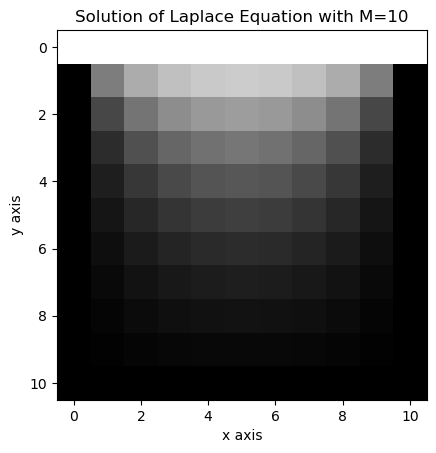

In [29]:
import matplotlib.pyplot as plt 

plt.imshow(phi)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Solution of Laplace Equation with M=%i'%M)
plt.show()

## Exercise 3

Now repeat Exercises 1 and 2 with M=100. Do you notice a difference in runtime?

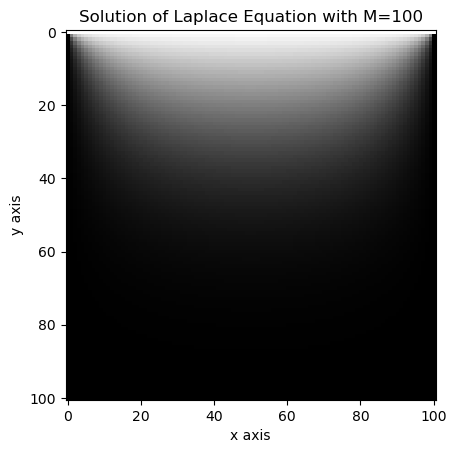

In [ ]:
M = 100
V = 1.0
target = 1e-4

phi = np.zeros((M+1, M+1), float)
phi[0, :] = V
phiprime = np.empty((M+1, M+1), float)


delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
            
    delta = np.max(np.abs(phi - phiprime))
    phi, phiprime = phiprime, phi


plt.imshow(phi)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Solution of Laplace Equation with M=%i'%M)
plt.show()

##runtime is significantly longer

# Hyperbolic Example: Wave Equation

Recall the 1D wave equation:
$$ \frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2} $$
Consider a piano string of length $L$, initially at rest. At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of from the string. The string vibrates as a result of being struck, except at the ends, $x=0$, and $x=L$, where it is held fixed.

Consider the case $v=100\mathrm{ms^{-1}}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{equation}
  \psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
\end{equation}
where $L=1$m, $d=10$cm, $C=1\mathrm{ms^{-1}}$, and $\sigma=0.3$m. 

## Exercise 4

Solve using the FTCS method, with grid spacing (in $x$) $a=5$ mm, from times 0 to 0.1s using time--step $h=10^{-6}$ s.
Make a plot of $\phi$ vs $x$ over the entire length of string, at each of the following times:
* 0.006 s
* 0.004 s
* 0.002 s
* 0.012 s
* 0.100 s

You'll see your first 4 plots look good, then the instability of the solution shows up!

/var/folders/rf/0409wb854zq4k3707lx0g85h0000gn/T/ipykernel_18256/3470346586.py:33: RuntimeWarning: overflow encountered in scalar add
  psi[m, n+1] = (-2*h*v**2/a**2)*phi[m, n] + psi[m, n] + (h*v**2/a**2)*(phi[m+1, n] + phi[m-1, n])
/var/folders/rf/0409wb854zq4k3707lx0g85h0000gn/T/ipykernel_18256/3470346586.py:33: RuntimeWarning: invalid value encountered in scalar add
  psi[m, n+1] = (-2*h*v**2/a**2)*phi[m, n] + psi[m, n] + (h*v**2/a**2)*(phi[m+1, n] + phi[m-1, n])


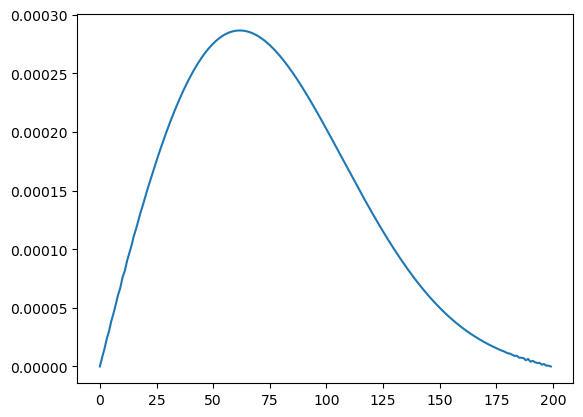

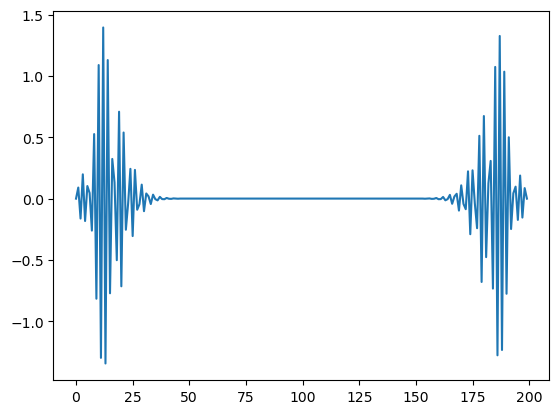

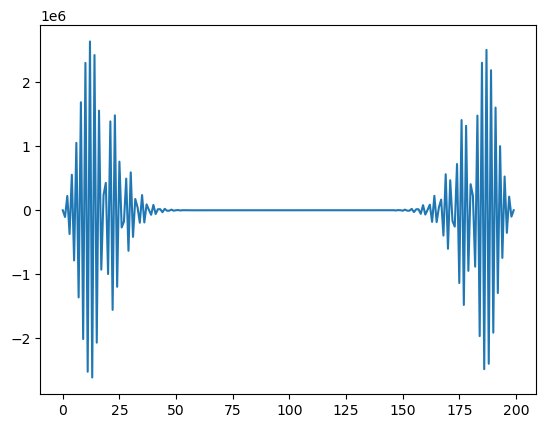

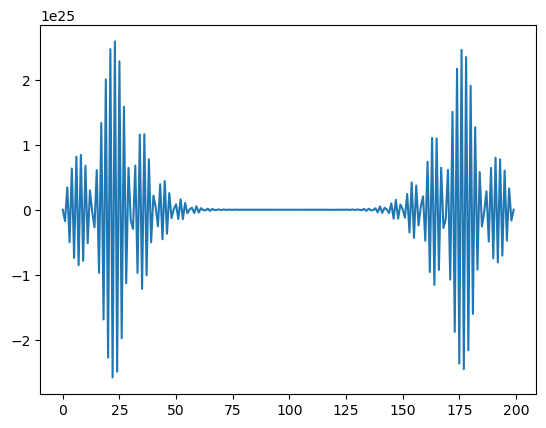

IndexError: index 10000 is out of bounds for axis 1 with size 10000

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

def velocity_prof(x):
    L = 1
    d = 0.1
    C = 1
    sigma = 0.3
    return C*(x*(L-x)/L**2)*np.exp(-((x-d)**2) / (2*sigma**2))

L = 1 #m
a = 0.005 #m
M = int(L/a)
h = 10e-6 #s
tmax = 0.1 #s
N = int(tmax/h)
v = 100 #m/s

x = np.linspace(0, L, M)
t = np.linspace(0, tmax, N)
phi = np.zeros((M, N), float) #zero everywhere at all space for t=0
psi = np.zeros((M, N), float)    # velocity profile everywhere for t=0
psi[:,0] = velocity_prof(x)


for n in range(0, N-1):
    for m in range(0, M-1):
        if m == 0 or m == M-1:
            phi[m, n] = 0
        
        else:
            phi[m, n+1] = phi[m, n] + h*psi[m, n]
            psi[m, n+1] = (-2*h*v**2/a**2)*phi[m, n] + psi[m, n] + (h*v**2/a**2)*(phi[m+1, n] + phi[m-1, n])

     
        
times = (0.002, 0.004, 0.006, 0.012, 0.100)
for time in times:
    idx = int(time/h)
    plt.plot(phi[:, idx])

    plt.show()


#i think this is right, math checks out, but solutions look messy..



## Exercise 5

Repeat the previous exercise using the Crank--Nicolson method. Use a larger time--step, $h = 10^{-4}$ s.

You'll see the solution is stable. It dies out to 0 at about 0.1 s, but this is how the physical system is supposed to behave!

the CN method involves a set of simultaneous equations, one for each grid point. We can solve using the methods for linear systems in Chapter 6 -- in particular, banded matrix. The following snippets of code will help you define the matrix, and the vector to use on the right-hand side, of the CK equations.

In [60]:
def matrix(N,alpha):
    """Banded matrix for the Crank-Nicolson
    Args: 
        N : number of elements
        alpha = 2*h*v**2/a**2 , h: timestep length, a: spatial grid spacing, v: wave speed"""
    bands = np.zeros((3,N+2))
    bands[0,:-2] = -alpha
    bands[2,1:-1] = -alpha
    bands[1,:] = 1+2*alpha
    return bands 

def banded(Aa,va,up=1,down=1):
# from textbook online resources, to solve Ax = v
# Aa is banded matrix A, va is vector v, up and down give band positions in matrix

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [ ]:
def rhs(phi, psi, alpha,h):
    """Solve the Right hand side of the Crank-Nicolson algorithm.
    Args:
        phi, psi : position and velocity
        alpha = 2*h*v**2/a**2,
        h=dt, timestep
    
    Returns:
    the column vector for the right hand side.
    """
    r = np.zeros_like(phi)
    r[1:-1] = (h*psi[1:-1] + 
               alpha * phi[:-2] +
               (1-2*alpha)*phi[1:-1] + 
               alpha * phi[2:])
    return r




    #no idea how to use any of this.. 

alpha = 2*h*v**2/a**2
bands = matrix(N, alpha)
